In [80]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import os
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten
from keras.models import Sequential
import imghdr
import cv2
from zipfile import ZipFile

In [81]:
# loading data from Zipfile 

with ZipFile('Data.zip','r') as zipfile :
    zipfile.extractall()
    print("Done")

Done


In [82]:
# Creating direction for my data

data_dir = 'Data'

In [83]:
# exploring my classes that need to be classifier

os.listdir(data_dir)

['Bus', 'Car']

In [84]:
# detecting specicfic Extentions for clean training model

extention_image = ['png', 'jpg','jpeg','bmp']

In [85]:
# cleaning images by passing on all image in my data and removeing not Existed extention


# making loop for accesing to class 2 , 3 , 4 , ......
for img_class in os.listdir(data_dir):
#     making loop for accesing to images in classess
    for img in os.listdir(os.path.join(data_dir,img_class)):
#       Creating a direction from file data to img 
        img_path = os.path.join(data_dir,img_class,img)
        try:
#           reading image by cv library if we need to see our data
            img_reading = cv2.imread(img_path)
#           extracting extintion from picturs and store it in tip
            tip = imghdr.what(img_path)
#           Cheaking if our detected Extintion that is the Extintion of our photo 
            if tip not in extention_image:
                print("Image {} doesn't have exist Extention".format(img_path))
#             Deleting unknowen Extintion pictures
                os.remove(img_path)
        except Exception as e :
            print("Issue with Image {}".formate(img_path))
            

Image Data\Bus\1200px-LT_471_28LTZ_147129_Arriva_London_New_Routemaster_281952285921829.jpg doesn't have exist Extention
Image Data\Bus\Best-eelven-march_d.jpg doesn't have exist Extention
Image Data\Bus\bus-Tokyo-Metropolitan-Bureau-of-Transportation-Japan.jpg doesn't have exist Extention
Image Data\Bus\cardinalbus-bright.jpg doesn't have exist Extention
Image Data\Bus\Charter-Bus-Rentals-Photo.jpg doesn't have exist Extention
Image Data\Bus\Delhi_electric_buses.jpg doesn't have exist Extention
Image Data\Bus\Greyhound-bus.jpg doesn't have exist Extention
Image Data\Bus\three-metallic-buses-staying-parking-260nw-1127237135.jpg doesn't have exist Extention
Image Data\Bus\tourist-buses-on-parking-sunrise-260nw-2047562468.jpg doesn't have exist Extention
Image Data\Car\aston-martin-2118857__480.jpg doesn't have exist Extention
Image Data\Car\car-1880381__480.jpg doesn't have exist Extention
Image Data\Car\car-photography_fb-img_1200x800.jpg doesn't have exist Extention
Image Data\Car\mod

In [86]:
# utils in tensorflow spliting data with specific shape and with a batches into files and classes
# with another definition building our pipline
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 769 files belonging to 2 classes.


In [87]:
# this line of code allow us to access to our data
data_iter = data.as_numpy_iterator()

In [88]:
# and this actually accessing to our data
batches = data_iter.next()

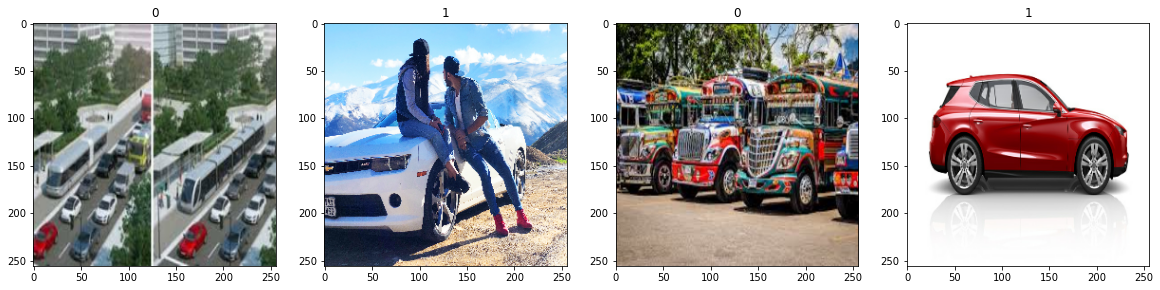

In [89]:
# here to know our label of data what is belong  we spliting our data to like places (fig) has 4 colums and actual content 
fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
#  here made a for loop to access the all shuffle data as index and images that enumerate made to me
for indx , img in enumerate(batches[0][:4]) :
#   showing in place of the image of the index of the enumerate
    ax[indx].imshow(img.astype(int))
#     Putting the labels of the image above there pictures
    ax[indx].title.set_text(batches[1][indx])

In [90]:
# preprocessing pixcels of the data from 0 to 1 
data = data.map(lambda X,y : (X/255.0, y))

In [91]:
# allowing us ot access the data

data_interations = data.as_numpy_iterator()

In [92]:
# acualy acessing the data

data_batches = data_interations.next()

In [93]:
# making sure that our data between 0 and 1
print(data_batches[0].max())
print(data_batches[0].min())

1.0
0.0


In [94]:
# number of batches
len(data)

25

In [95]:
# defining the number of training batches in data

training_size = int(len(data)*.7)

# defining the number of Validation batches in data

validation_size =int(len(data)*.2)

# defining the number of testing batches in data

testting_size = int(len(data)*.1)+1

In [96]:
#  must the addition of all sizes equals = 25
print(training_size)
print(validation_size)
print(testting_size)

17
5
3


In [97]:
# take and skip method are used with tensorflow dataSet pipline

training_data = data.take(training_size)

# skiping the data that we took it in taining and taking another collaction of data 

Validation_data = data.skip(training_size).take(validation_size)

# skiping the data that we took it in training_size , validation_size and taking another collaction of data for testing

testing_data = data.skip(training_size+validation_size).take(testting_size)



In [98]:
# Buliding our CNN (Convelution Neural Network) MOdel

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())


model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128,kernel_size=(3,3),strides=1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [99]:
# Creating a Directory 
logdir = 'logs'

In [100]:
#  Creating a Visualization tool
tensorboard_Callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [101]:
# Compiling our model to prepare it to training
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])

# training our model 

hist = model.fit(training_data , epochs=12 , validation_data=Validation_data,callbacks=[tensorboard_Callback])

Epoch 1/12
17/17 [==============================] - 97s 5s/step - loss: 0.9915 - accuracy: 0.5165 - val_loss: 0.6489 - val_accuracy: 0.6687
Epoch 2/12
17/17 [==============================] - 51s 3s/step - loss: 0.6323 - accuracy: 0.6324 - val_loss: 0.6518 - val_accuracy: 0.6187
Epoch 3/12
17/17 [==============================] - 51s 3s/step - loss: 0.6126 - accuracy: 0.6489 - val_loss: 0.5795 - val_accuracy: 0.7000
Epoch 4/12
17/17 [==============================] - 52s 3s/step - loss: 0.5605 - accuracy: 0.7132 - val_loss: 0.4430 - val_accuracy: 0.7937
Epoch 5/12
17/17 [==============================] - 52s 3s/step - loss: 0.4299 - accuracy: 0.8033 - val_loss: 0.4733 - val_accuracy: 0.8062
Epoch 6/12
17/17 [==============================] - 52s 3s/step - loss: 0.3770 - accuracy: 0.8401 - val_loss: 0.3448 - val_accuracy: 0.8375
Epoch 7/12
17/17 [==============================] - 53s 3s/step - loss: 0.3342 - accuracy: 0.8676 - val_loss: 0.3666 - val_accuracy: 0.8438
Epoch 8/12
17/17 [==

In [102]:
# displaying history of losess and accuracy

hist.history

{'loss': [0.9914905428886414,
  0.6322785019874573,
  0.6125916242599487,
  0.5604504942893982,
  0.4298786222934723,
  0.3769954741001129,
  0.33418649435043335,
  0.28626835346221924,
  0.21418367326259613,
  0.14447520673274994,
  0.10242803394794464,
  0.09568481892347336],
 'accuracy': [0.5165441036224365,
  0.6323529481887817,
  0.6488970518112183,
  0.7132353186607361,
  0.8033088445663452,
  0.8400735259056091,
  0.8676470518112183,
  0.9007353186607361,
  0.9191176295280457,
  0.9503676295280457,
  0.9577205777168274,
  0.966911792755127],
 'val_loss': [0.6489412784576416,
  0.6517631411552429,
  0.579502284526825,
  0.442997545003891,
  0.47327977418899536,
  0.3447937071323395,
  0.3666161894798279,
  0.22320318222045898,
  0.3634503483772278,
  0.16632039844989777,
  0.21694603562355042,
  0.12862557172775269],
 'val_accuracy': [0.668749988079071,
  0.6187499761581421,
  0.699999988079071,
  0.793749988079071,
  0.8062499761581421,
  0.8374999761581421,
  0.84375,
  0.92500

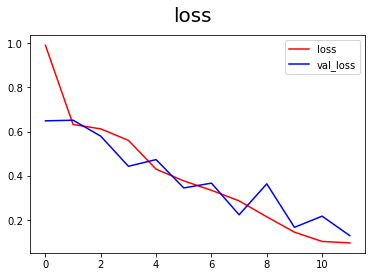

In [103]:
#  visulizing our history lossing 
fig = plt.figure()
plt.plot(hist.history['loss'],color='red' , label='loss')
plt.plot(hist.history['val_loss'],color='blue' , label='val_loss')
fig.suptitle('loss' , fontsize=20)
plt.legend(loc='upper right')
plt.show()

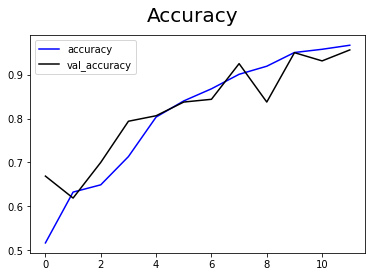

In [104]:
#  visulizing our history Accuracy 

fig = plt.figure()
plt.plot(hist.history['accuracy'] , color='blue' , label='accuracy')
plt.plot(hist.history['val_accuracy'] , color='black' , label='val_accuracy')
fig.suptitle('Accuracy' , fontsize=20)
plt.legend()
plt.show()

In [105]:
# importing libraries to evalute the accuracy
from tensorflow.keras.metrics import Precision , BinaryAccuracy , Recall

Pre = Precision()
Bin = BinaryAccuracy()
Rec = Recall()

In [106]:
len(testing_data)

3

In [107]:
# appending our testing images and labels or class both in batches
for batch in testing_data.as_numpy_iterator():
#     splititng our data and labels with X , y respectivily
    X ,y = batch
#     predicting with X
    pred = model.predict(X)
    Pre.update_state(y,pred)
    Bin.update_state(y,pred)
    Rec.update_state(y,pred)

1/1 [==============================] - 0s 281ms/step


In [108]:
# printing our results
print(f"Percision is {Pre.result()} , Binary Accuracy is {Bin.result()}, Recall Accuracy is {Rec.result()} ")

Percision is 0.9142857193946838 , Binary Accuracy is 0.9538461565971375, Recall Accuracy is 1.0 


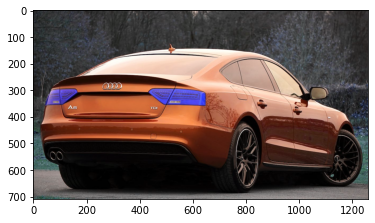

In [152]:
# loading a pic wth CV2 Library
image = cv2.imread("pexels-photo-244212.jpeg")
plt.imshow(image)
plt.show()

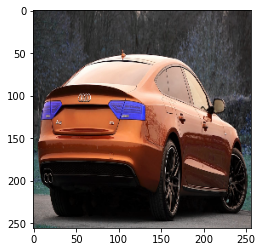

In [169]:
# resizing our image because our image must be  keras.utils 
resize = tf.image.resize(image , (256,256))
# After Converting our Resizing image to Tensor we must prepare our data for predicting by converting it to numpy and range it 
# from 0 to 1
plt.imshow(resize.numpy().astype(int))
plt.show()

In [155]:
# our Neural Networks Expect to pass to it a batches of images and np.expand_dims 
# puts to extra Dimention to fit with the size of batches and devided to 255.0 to make our image array between 0 and 1
y_hat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 80ms/step


In [156]:
#  because our algorthim is sigmoid our output will be between 0 to 1 
y_hat

array([[0.98131657]], dtype=float32)

In [157]:
# express our output
if y_hat > 0.5 :
    print("There is a Car in this Picture")
else:
    print("There is a Bus in this Picture")

There is a Car in this Picture


In [158]:
# for loading the model if we want to 
from tensorflow.keras.models import load_model

In [159]:
# creating file call models and rename our model to Car&Bus......
model.save(os.path.join("models","Car&Bus_Classification.h5"))

In [160]:
# loading our model
new_model = load_model(os.path.join("models","Car&Bus_Classification.h5"))

In [162]:
#  make a prediction
loading_Model = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 35ms/step


In [164]:
# printing prediction output
print(loading_Model)

[[0.98131657]]
